In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('/content/drive/MyDrive/NLP/Project NLP/CNN_Articels_clean.csv')

In [78]:
df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...


In [79]:
df = df.head(4000)

In [80]:
df = df[['Date published','Headline','Description']]

In [81]:
df

,Date published,Headline,Description
0,2021-07-15 02:46:59,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...
1,2021-05-12 07:52:09,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...
2,2021-06-16 02:51:30,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou..."
3,2022-03-15 09:57:36,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg..."
4,2022-03-15 11:27:02,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...
...,...,...,...
3995,2021-12-08 22:41:29,Barcelona dumped out of Champions League group...,Barcelona crashed out of this season's Champio...
3996,2021-12-08 09:38:55,"Olaf Scholz becomes Germany's new chancellor, ...",Olaf Scholz has been sworn in as Germany's new...
3997,2021-12-07 13:04:01,The Ashes: Australia and England look to put ...,Australia and England take to the field for th...
3998,2014-07-21 16:21:10,Keith Richards Fast Facts - CNN,"Read CNN's Fast Facts on musician, songwriter,..."


In [82]:
import spacy
nlp = spacy.load('en_core_web_sm') 

In [83]:
def extract_events(text):
    doc = nlp(text)  
    events = []
    sent_vecs = {}
    for sent in doc.sents:  
        for token in sent: 
            if token.pos_ == 'VERB':  
                event = {'verb': token.lemma_, 'subject': None, 'object': None}
                for child in token.children:
                    if child.dep_ == 'nsubj':  
                        event['subject'] = child.text
                    elif child.dep_ == 'dobj': 
                        event['object'] = child.text
                events.append(event)
                sent_vecs.update({text: doc.vector})
    return events

In [84]:
from tqdm import tqdm
#sent_vecs = {}
#docs = []

for title in tqdm(df.Headline):
  extract_events(title)
  #doc = nlp(title)
  #docs.append(doc)
  #sent_vecs.update({title: doc.vector})

sentences = list(sent_vecs.keys())
vectors = list(sent_vecs.values())

100%|██████████| 4000/4000 [00:44<00:00, 90.60it/s] 


In [85]:
import numpy as np
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

x = np.array(vectors)

n_classes = {}

for i in tqdm(np.arange(0.001, 1, 0.002)):
  dbscan = DBSCAN(eps = i, min_samples = 2, metric = 'cosine').fit(x)
  n_classes.update({i: len(pd.Series(dbscan.labels_).value_counts())})

dbscan  = DBSCAN(eps = 0.08, min_samples = 2, metric = 'cosine')

100%|██████████| 500/500 [02:56<00:00,  2.84it/s]


In [86]:
print(n_classes)

{0.001: 1, 0.003: 1, 0.005: 2, 0.007: 3, 0.009000000000000001: 3, 0.011: 3, 0.013000000000000001: 3, 0.015: 3, 0.017: 3, 0.019000000000000003: 4, 0.021: 4, 0.023: 4, 0.025: 5, 0.027000000000000003: 5, 0.029: 6, 0.031: 6, 0.033: 6, 0.035: 6, 0.037000000000000005: 5, 0.039: 7, 0.041: 7, 0.043000000000000003: 8, 0.045: 8, 0.047: 9, 0.049: 9, 0.051000000000000004: 9, 0.053000000000000005: 9, 0.055: 11, 0.057: 13, 0.059000000000000004: 13, 0.061: 14, 0.063: 15, 0.065: 18, 0.067: 19, 0.069: 24, 0.07100000000000001: 30, 0.07300000000000001: 32, 0.075: 34, 0.077: 36, 0.079: 37, 0.081: 39, 0.083: 43, 0.085: 46, 0.08700000000000001: 43, 0.089: 50, 0.091: 53, 0.093: 63, 0.095: 59, 0.097: 60, 0.099: 64, 0.101: 68, 0.10300000000000001: 73, 0.10500000000000001: 69, 0.107: 75, 0.109: 76, 0.111: 73, 0.113: 70, 0.115: 72, 0.117: 68, 0.11900000000000001: 69, 0.121: 67, 0.123: 67, 0.125: 65, 0.127: 57, 0.129: 59, 0.131: 62, 0.133: 71, 0.135: 67, 0.137: 63, 0.139: 61, 0.14100000000000001: 57, 0.1430000000

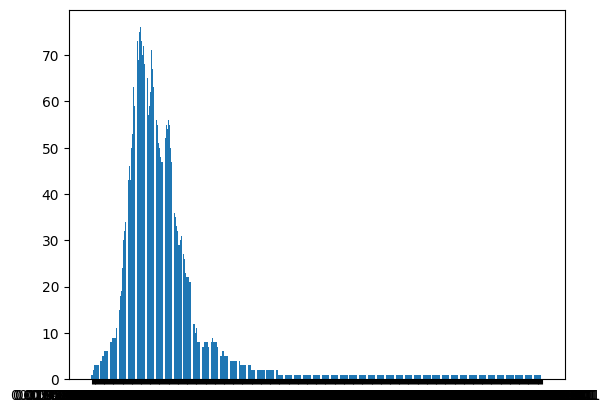

In [87]:
import matplotlib.pyplot as plt


plt.bar(range(len(n_classes)), list(n_classes.values()), align='center')
plt.xticks(range(len(n_classes)), list(n_classes.keys()))

plt.show()

In [88]:
dbscan.fit(x)
labels = dbscan.labels_
results = pd.DataFrame({'label': labels, 'sent': sentences})
example_result = results[results.label == 3].sent.tolist()
event_df = df[df.Headline.isin(example_result)][['Date published', 'Headline']]
event_df['Date published'] = pd.to_datetime(event_df['Date published'])
event_df = event_df.sort_values(by='Date published').dropna()


In [89]:
event_df

,Date published,Headline
604,2018-10-18 18:44:52,US Justice Department investigating Pennsylvan...
370,2020-08-30 17:40:59,Lewis Hamilton pays tribute to Chadwick Bosema...
782,2021-01-29 10:58:36,Liverpool FC vs. Tottenham Hotspur FC: Harry K...
1419,2021-03-05 13:45:22,Prince Philip moves to King Edward VII Hospita...
1354,2021-03-13 09:23:17,NFL: Tom Brady signs new deal with the Tampa B...
1711,2021-04-01 09:50:25,World Cup: North Macedonia stun Germany - CNN
1534,2021-04-21 10:35:11,John W. Henry: Liverpool FC owner apologises a...
1812,2021-05-20 09:40:06,Cristiano Ronaldo cements domestic dominance a...
1786,2021-05-23 16:52:02,Henrik Stenson snaps club during PGA Champions...
2215,2021-06-06 14:41:47,F1 results: Sergio Perez claims win at 2021 Az...
